# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model. 

Code snippets and ideas from https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/



In [6]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import time
from sklearn.metrics import calinski_harabaz_score

In [16]:
def get_dominant_color(image, k, image_processing_size = (50, 50)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input


    """
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 

    clt = MiniBatchKMeans(n_clusters = k).fit(image)    
   
    
#     clt_2 = MiniBatchKMeans(n_clusters = k-2).fit(image)
#     clt_3 = MiniBatchKMeans(n_clusters = k-1).fit(image)
#     clt_5 = MiniBatchKMeans(n_clusters = k+1).fit(image)
#     clt_6 = MiniBatchKMeans(n_clusters = k+2).fit(image)
#     clt_7 = MiniBatchKMeans(n_clusters = k+3).fit(image)
#     clt_8 = MiniBatchKMeans(n_clusters = k+4).fit(image)
#     clt_9 = MiniBatchKMeans(n_clusters = k+5).fit(image)
#     clt_10 = MiniBatchKMeans(n_clusters = k+6).fit(image)
#     clt_11 = MiniBatchKMeans(n_clusters = k+7).fit(image)
#     clt_12 = MiniBatchKMeans(n_clusters = k+8).fit(image)
    
#     clt_list = [clt, clt_2, clt_3, clt_5, clt_6, clt_7, clt_8, clt_9, clt_10,
#                  clt_11,  clt_12]
#     CH_score = []

#     for model in clt_list:
#         labels = model.labels_
#         CH_score.append(calinski_harabaz_score(image, labels))
    
#     plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], CH_score)
#     plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#     plt.title("Calinski Harabaz Scores for Different Values of K")
#     plt.ylabel("Variance Ratio")
#     plt.xlabel("K=")
#     plt.show()
    
#     clt = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=45,
#                       n_init=10, max_no_improvement=10, verbose=0).fit(image)
    
    labels = clt.predict(image)
    
#     plt.scatter(image[:, 0], image[:, 1], c=labels, s=10)
#     centers = clt.cluster_centers_
#     plt.scatter(centers[:,0], centers[:, 1], c='black', s=70)
#     plt.show()

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]
    dominant_color_4 = clt.cluster_centers_[label_counts.most_common(4)[3][0]]
    dominant_color_5 = clt.cluster_centers_[label_counts.most_common(5)[4][0]]
    dominant_color_6 = clt.cluster_centers_[label_counts.most_common(6)[5][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3), list(dominant_color_4), list(dominant_color_5), list(dominant_color_6)

get_dominant_color function: 0.032s

Most prominent color:
red: 12  green:  17  blue:  19 
Hex:  #0c1113

Second color:
red: 218  green:  17  blue:  200 
Hex:  #dad3c8

Third color:
red: 42  green:  17  blue:  29 
Hex:  #2a291d

Fourth color:
red: 95  green:  79  blue:  48 
Hex:  #5f4f30

Fifth color:
red: 172  green:  166  blue:  136 
Hex:  #aca688

Sixth color:
red: 202  green:  134  blue:  90 
Hex:  #ca865a


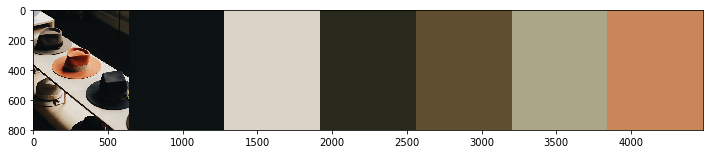

get_dominant_color function: 0.038s

Most prominent color:
red: 168  green:  163  blue:  144 
Hex:  #a8a390

Second color:
red: 214  green:  163  blue:  220 
Hex:  #d6d9dc

Third color:
red: 20  green:  163  blue:  29 
Hex:  #141b1d

Fourth color:
red: 114  green:  95  blue:  66 
Hex:  #725f42

Fifth color:
red: 50  green:  41  blue:  31 
Hex:  #32291f

Sixth color:
red: 13  green:  70  blue:  43 
Hex:  #0d462b


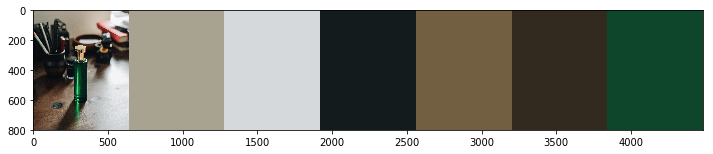

get_dominant_color function: 0.041s

Most prominent color:
red: 206  green:  211  blue:  215 
Hex:  #ced3d7

Second color:
red: 155  green:  211  blue:  176 
Hex:  #9bafb0

Third color:
red: 88  green:  211  blue:  111 
Hex:  #586b6f

Fourth color:
red: 140  green:  136  blue:  105 
Hex:  #8c8869

Fifth color:
red: 17  green:  31  blue:  39 
Hex:  #111f27

Sixth color:
red: 201  green:  174  blue:  134 
Hex:  #c9ae86


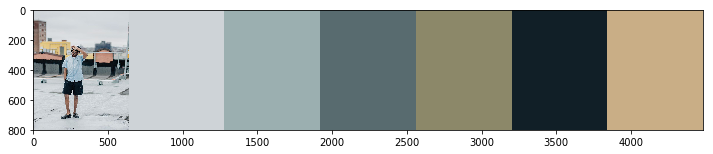

get_dominant_color function: 0.037s

Most prominent color:
red: 52  green:  79  blue:  83 
Hex:  #344f53

Second color:
red: 32  green:  79  blue:  58 
Hex:  #20373a

Third color:
red: 145  green:  79  blue:  111 
Hex:  #91836f

Fourth color:
red: 16  green:  26  blue:  37 
Hex:  #101a25

Fifth color:
red: 103  green:  96  blue:  77 
Hex:  #67604d

Sixth color:
red: 191  green:  188  blue:  180 
Hex:  #bfbcb4


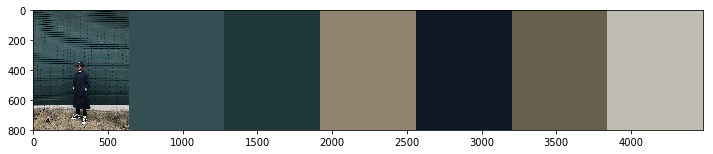

get_dominant_color function: 0.033s

Most prominent color:
red: 177  green:  89  blue:  57 
Hex:  #b15939

Second color:
red: 84  green:  89  blue:  34 
Hex:  #543122

Third color:
red: 180  green:  89  blue:  100 
Hex:  #b47f64

Fourth color:
red: 26  green:  54  blue:  28 
Hex:  #1a361c

Fifth color:
red: 135  green:  120  blue:  98 
Hex:  #877862

Sixth color:
red: 27  green:  17  blue:  37 
Hex:  #1b1125


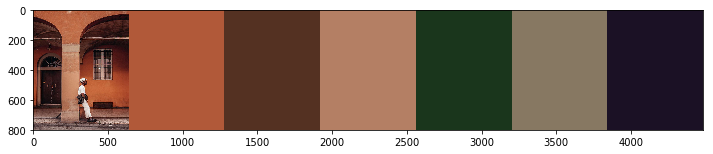

get_dominant_color function: 0.130s

Most prominent color:
red: 183  green:  182  blue:  172 
Hex:  #b7b6ac

Second color:
red: 169  green:  182  blue:  149 
Hex:  #a9a395

Third color:
red: 143  green:  182  blue:  116 
Hex:  #8f8674

Fourth color:
red: 23  green:  26  blue:  31 
Hex:  #171a1f

Fifth color:
red: 57  green:  70  blue:  68 
Hex:  #394644

Sixth color:
red: 124  green:  137  blue:  135 
Hex:  #7c8987


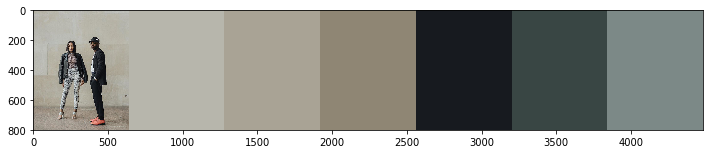

get_dominant_color function: 0.062s

Most prominent color:
red: 216  green:  195  blue:  177 
Hex:  #d8c3b1

Second color:
red: 177  green:  195  blue:  161 
Hex:  #b1a8a1

Third color:
red: 56  green:  195  blue:  63 
Hex:  #38413f

Fourth color:
red: 131  green:  127  blue:  118 
Hex:  #837f76

Fifth color:
red: 140  green:  90  blue:  65 
Hex:  #8c5a41

Sixth color:
red: 75  green:  80  blue:  58 
Hex:  #4b503a


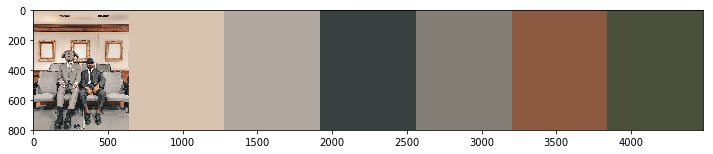

get_dominant_color function: 0.066s

Most prominent color:
red: 158  green:  152  blue:  138 
Hex:  #9e988a

Second color:
red: 174  green:  152  blue:  156 
Hex:  #aea99c

Third color:
red: 121  green:  152  blue:  98 
Hex:  #797562

Fourth color:
red: 157  green:  122  blue:  63 
Hex:  #9d7a3f

Fifth color:
red: 80  green:  73  blue:  52 
Hex:  #504934

Sixth color:
red: 33  green:  37  blue:  32 
Hex:  #212520


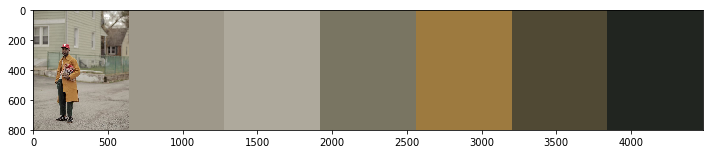

get_dominant_color function: 0.048s

Most prominent color:
red: 33  green:  50  blue:  62 
Hex:  #21323e

Second color:
red: 134  green:  50  blue:  60 
Hex:  #86463c

Third color:
red: 70  green:  50  blue:  30 
Hex:  #46341e

Fourth color:
red: 16  green:  22  blue:  23 
Hex:  #101617

Fifth color:
red: 64  green:  34  blue:  50 
Hex:  #402232

Sixth color:
red: 136  green:  132  blue:  104 
Hex:  #888468


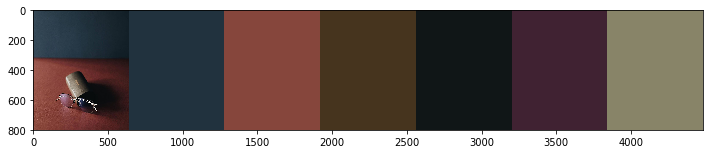

get_dominant_color function: 0.050s

Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 170  green:  0  blue:  58 
Hex:  #aa8c3a

Third color:
red: 111  green:  0  blue:  33 
Hex:  #6f7221

Fourth color:
red: 210  green:  177  blue:  100 
Hex:  #d2b164

Fifth color:
red: 9  green:  34  blue:  6 
Hex:  #092206

Sixth color:
red: 10  green:  9  blue:  6 
Hex:  #0a0906


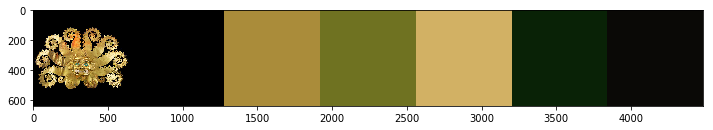

get_dominant_color function: 0.103s

Most prominent color:
red: 229  green:  229  blue:  229 
Hex:  #e5e5e5

Second color:
red: 212  green:  229  blue:  209 
Hex:  #d4d5d1

Third color:
red: 115  green:  229  blue:  107 
Hex:  #73756b

Fourth color:
red: 71  green:  83  blue:  81 
Hex:  #475351

Fifth color:
red: 162  green:  159  blue:  150 
Hex:  #a29f96

Sixth color:
red: 23  green:  29  blue:  34 
Hex:  #171d22


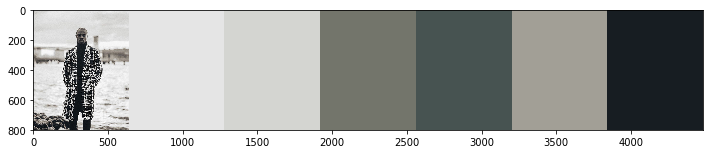

get_dominant_color function: 0.054s

Most prominent color:
red: 210  green:  207  blue:  196 
Hex:  #d2cfc4

Second color:
red: 183  green:  207  blue:  123 
Hex:  #b79d7b

Third color:
red: 112  green:  207  blue:  48 
Hex:  #704a30

Fourth color:
red: 170  green:  114  blue:  72 
Hex:  #aa7248

Fifth color:
red: 131  green:  132  blue:  109 
Hex:  #83846d

Sixth color:
red: 55  green:  69  blue:  70 
Hex:  #374546


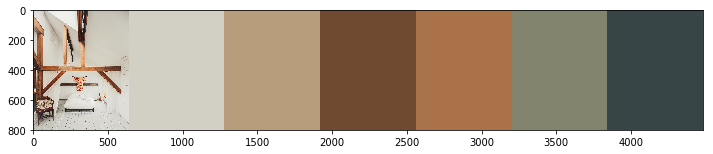

get_dominant_color function: 0.046s

Most prominent color:
red: 195  green:  197  blue:  190 
Hex:  #c3c5be

Second color:
red: 211  green:  197  blue:  207 
Hex:  #d3d4cf

Third color:
red: 168  green:  197  blue:  90 
Hex:  #a8815a

Fourth color:
red: 199  green:  171  blue:  139 
Hex:  #c7ab8b

Fifth color:
red: 143  green:  99  blue:  62 
Hex:  #8f633e

Sixth color:
red: 56  green:  58  blue:  41 
Hex:  #383a29


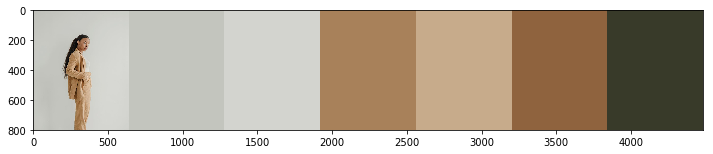

get_dominant_color function: 0.028s

Most prominent color:
red: 111  green:  103  blue:  89 
Hex:  #6f6759

Second color:
red: 70  green:  103  blue:  56 
Hex:  #464838

Third color:
red: 164  green:  103  blue:  133 
Hex:  #a49285

Fourth color:
red: 30  green:  42  blue:  24 
Hex:  #1e2a18

Fifth color:
red: 5  green:  25  blue:  16 
Hex:  #051910

Sixth color:
red: 96  green:  63  blue:  34 
Hex:  #603f22


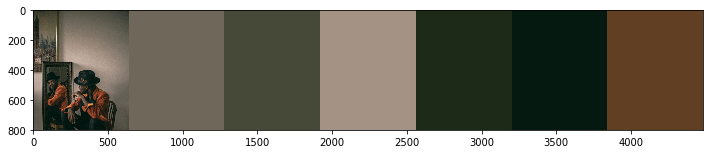

get_dominant_color function: 0.033s

Most prominent color:
red: 62  green:  70  blue:  72 
Hex:  #3e4648

Second color:
red: 89  green:  70  blue:  81 
Hex:  #595a51

Third color:
red: 195  green:  70  blue:  151 
Hex:  #c3ad97

Fourth color:
red: 143  green:  123  blue:  103 
Hex:  #8f7b67

Fifth color:
red: 100  green:  73  blue:  55 
Hex:  #644937

Sixth color:
red: 65  green:  55  blue:  47 
Hex:  #41372f


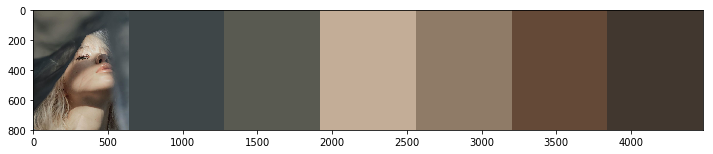

get_dominant_color function: 0.029s

Most prominent color:
red: 177  green:  89  blue:  57 
Hex:  #b15939

Second color:
red: 95  green:  89  blue:  40 
Hex:  #5f3828

Third color:
red: 188  green:  89  blue:  109 
Hex:  #bc8a6d

Fourth color:
red: 31  green:  54  blue:  24 
Hex:  #1f3618

Fifth color:
red: 121  green:  114  blue:  86 
Hex:  #797256

Sixth color:
red: 29  green:  17  blue:  40 
Hex:  #1d1128


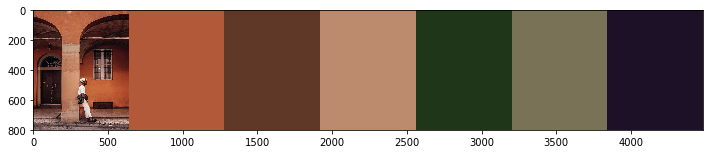

get_dominant_color function: 0.024s

Most prominent color:
red: 22  green:  30  blue:  38 
Hex:  #161e26

Second color:
red: 95  green:  30  blue:  34 
Hex:  #5f5a22

Third color:
red: 28  green:  30  blue:  63 
Hex:  #1c423f

Fourth color:
red: 28  green:  21  blue:  30 
Hex:  #1c151e

Fifth color:
red: 52  green:  25  blue:  51 
Hex:  #341933

Sixth color:
red: 91  green:  114  blue:  114 
Hex:  #5b7272


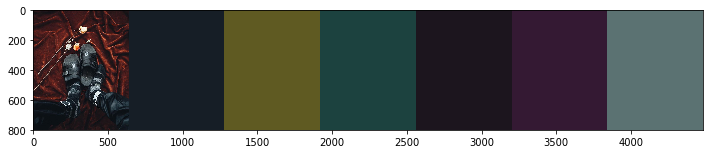

get_dominant_color function: 0.035s

Most prominent color:
red: 130  green:  115  blue:  105 
Hex:  #827369

Second color:
red: 179  green:  115  blue:  153 
Hex:  #b3a299

Third color:
red: 92  green:  115  blue:  59 
Hex:  #5c4a3b

Fourth color:
red: 121  green:  116  blue:  124 
Hex:  #79747c

Fifth color:
red: 99  green:  110  blue:  101 
Hex:  #636e65

Sixth color:
red: 27  green:  29  blue:  43 
Hex:  #1b1d2b


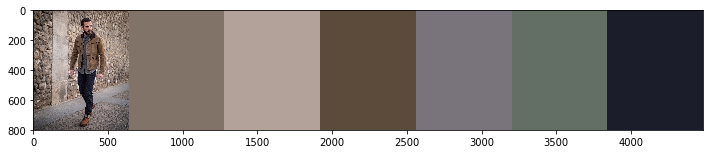

get_dominant_color function: 0.023s

Most prominent color:
red: 147  green:  147  blue:  128 
Hex:  #939380

Second color:
red: 174  green:  147  blue:  174 
Hex:  #aeb6ae

Third color:
red: 44  green:  147  blue:  35 
Hex:  #2c2f23

Fourth color:
red: 124  green:  109  blue:  83 
Hex:  #7c6d53

Fifth color:
red: 163  green:  120  blue:  65 
Hex:  #a37841

Sixth color:
red: 88  green:  70  blue:  35 
Hex:  #584623


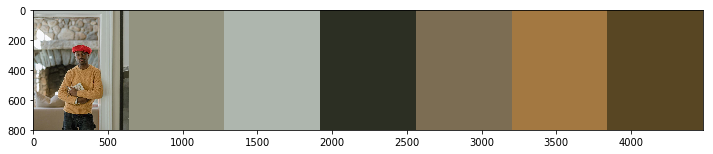

get_dominant_color function: 0.023s

Most prominent color:
red: 126  green:  153  blue:  161 
Hex:  #7e99a1

Second color:
red: 102  green:  153  blue:  136 
Hex:  #667b88

Third color:
red: 168  green:  153  blue:  180 
Hex:  #a8b8b4

Fourth color:
red: 196  green:  202  blue:  191 
Hex:  #c4cabf

Fifth color:
red: 204  green:  199  blue:  138 
Hex:  #ccc78a

Sixth color:
red: 74  green:  91  blue:  63 
Hex:  #4a5b3f


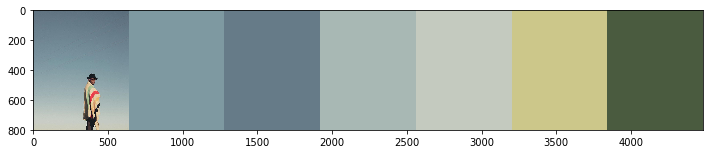

get_dominant_color function: 0.025s

Most prominent color:
red: 226  green:  227  blue:  222 
Hex:  #e2e3de

Second color:
red: 153  green:  227  blue:  131 
Hex:  #999283

Third color:
red: 188  green:  227  blue:  173 
Hex:  #bcb9ad

Fourth color:
red: 183  green:  166  blue:  132 
Hex:  #b7a684

Fifth color:
red: 118  green:  124  blue:  114 
Hex:  #767c72

Sixth color:
red: 81  green:  93  blue:  94 
Hex:  #515d5e


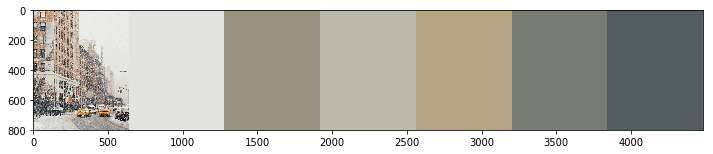

get_dominant_color function: 0.030s

Most prominent color:
red: 209  green:  209  blue:  204 
Hex:  #d1d1cc

Second color:
red: 93  green:  209  blue:  97 
Hex:  #5d6861

Third color:
red: 56  green:  209  blue:  69 
Hex:  #383f45

Fourth color:
red: 157  green:  159  blue:  150 
Hex:  #9d9f96

Fifth color:
red: 118  green:  116  blue:  104 
Hex:  #767468

Sixth color:
red: 107  green:  91  blue:  59 
Hex:  #6b5b3b


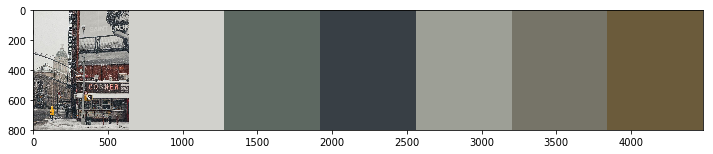

get_dominant_color function: 0.047s

Most prominent color:
red: 18  green:  22  blue:  26 
Hex:  #12161a

Second color:
red: 21  green:  22  blue:  26 
Hex:  #15161a

Third color:
red: 26  green:  22  blue:  34 
Hex:  #1a1c22

Fourth color:
red: 13  green:  17  blue:  18 
Hex:  #0d1112

Fifth color:
red: 14  green:  17  blue:  16 
Hex:  #0e1110

Sixth color:
red: 72  green:  96  blue:  68 
Hex:  #486044


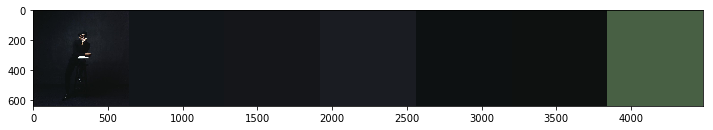

In [17]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())


for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3, dom_color_4, dom_color_5, dom_color_6 = get_dominant_color(hsv_image, k=6)
    print('get_dominant_color function: {:.3f}s'.format(time.time()-start))
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_4_hsv = np.full(bgr_image.shape, dom_color_4, dtype='uint8')
    #convert to bgr color space for display
    dom_color_4_rgb = cv2.cvtColor(dom_color_4_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_5_hsv = np.full(bgr_image.shape, dom_color_5, dtype='uint8')
    #convert to bgr color space for display
    dom_color_5_rgb = cv2.cvtColor(dom_color_5_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_6_hsv = np.full(bgr_image.shape, dom_color_6, dtype='uint8')
    #convert to bgr color space for display
    dom_color_6_rgb = cv2.cvtColor(dom_color_6_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb, dom_color_4_rgb, dom_color_5_rgb, dom_color_6_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    print('\nFourth color:\nred:', dom_color_4_rgb[0][0][0], ' green: ', dom_color_4_rgb[0][0][1],
          ' blue: ', dom_color_4_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_4_rgb[0][0][0], 
                                                                             dom_color_4_rgb[0][0][1], 
                                                                             dom_color_4_rgb[0][0][2]))
    
    print('\nFifth color:\nred:', dom_color_5_rgb[0][0][0], ' green: ', dom_color_5_rgb[0][0][1],
          ' blue: ', dom_color_5_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_5_rgb[0][0][0], 
                                                                             dom_color_5_rgb[0][0][1],
                                                                             dom_color_5_rgb[0][0][2]))
    
    print('\nSixth color:\nred:', dom_color_6_rgb[0][0][0], ' green: ', dom_color_6_rgb[0][0][1],
          ' blue: ', dom_color_6_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_6_rgb[0][0][0], 
                                                                             dom_color_6_rgb[0][0][1], 
                                                                             dom_color_6_rgb[0][0][2]))
    plt.figure(figsize=(12,6))
    plt.imshow(output_image)
    plt.show()

In [49]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

#58625e


Test of getting the Hue Saturation and Value

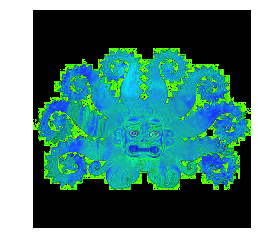

In [50]:
image = cv2.imread('./fohrtestimages/fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [51]:
image.shape

(224, 224, 3)

In [52]:
oriimg = cv2.imread('./fohrtestimages/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

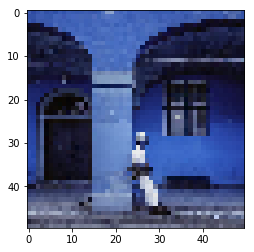

In [53]:
plt.imshow(img)

In [54]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [55]:
dominant_color_1

array([15.43457944, 14.47196262, 29.48130841])

In [56]:
label_counts.most_common(3)[1][0]

13

In [57]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [58]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [59]:
type(color_dict['first_color']['hex'])

str

In [60]:
print(json.dumps(color_dict))

{"first_color": {"red": 17, "green": 22, "blue": 25, "hex": "#111619"}, "second_color": {"red": 23, "green": 22, "blue: ": 29, "hex": "#17181d"}, "third_color": {"red": 15, "green": 22, "blue": 16, "hex": "#0f1210"}}
